# Logistic Regression with ROC Curve and ROC AUC score

In [24]:
from sklearn.datasets import make_classification
X,y = make_classification(n_samples=1000, n_classes=2, random_state=23)

In [25]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.25, random_state=78)

In [26]:
# created a dummy model with default 0 as output
dummy_model_prob = [0 for _ in range(len(y_test))]

In [27]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [28]:
# Prediction based on probability
model_prob = model.predict_proba(X_test)
model_prob = model_prob[:, 1]

In [29]:
# lets calculate the ROC AUC score
from sklearn.metrics import roc_auc_score
dummy_model_auc = roc_auc_score(y_test, dummy_model_prob)
model_auc = roc_auc_score(y_test, model_prob)
print(dummy_model_auc)
print(model_auc)

0.5
0.9708203933747411


In [40]:
# Compute ROC Curves
from sklearn.metrics import roc_curve
dummy_fpr, dumm_tpr, _ = roc_curve(y_test, dummy_model_prob)
model_fpr, model_tpr, thresholds = roc_curve(y_test, model_prob)

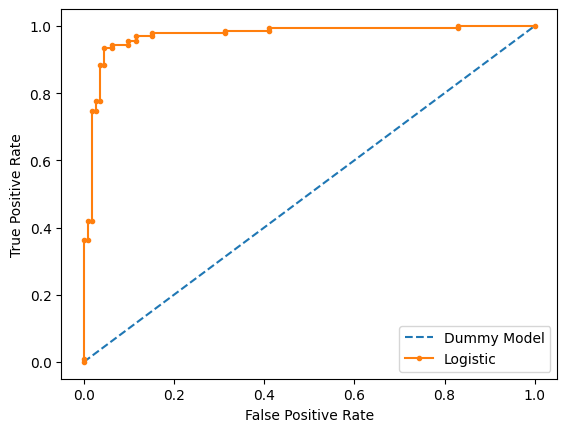

In [41]:
import matplotlib.pyplot as plt
plt.plot(dummy_fpr, dumm_tpr, linestyle='--', label='Dummy Model')
plt.plot(model_fpr, model_tpr, marker='.', label='Logistic')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

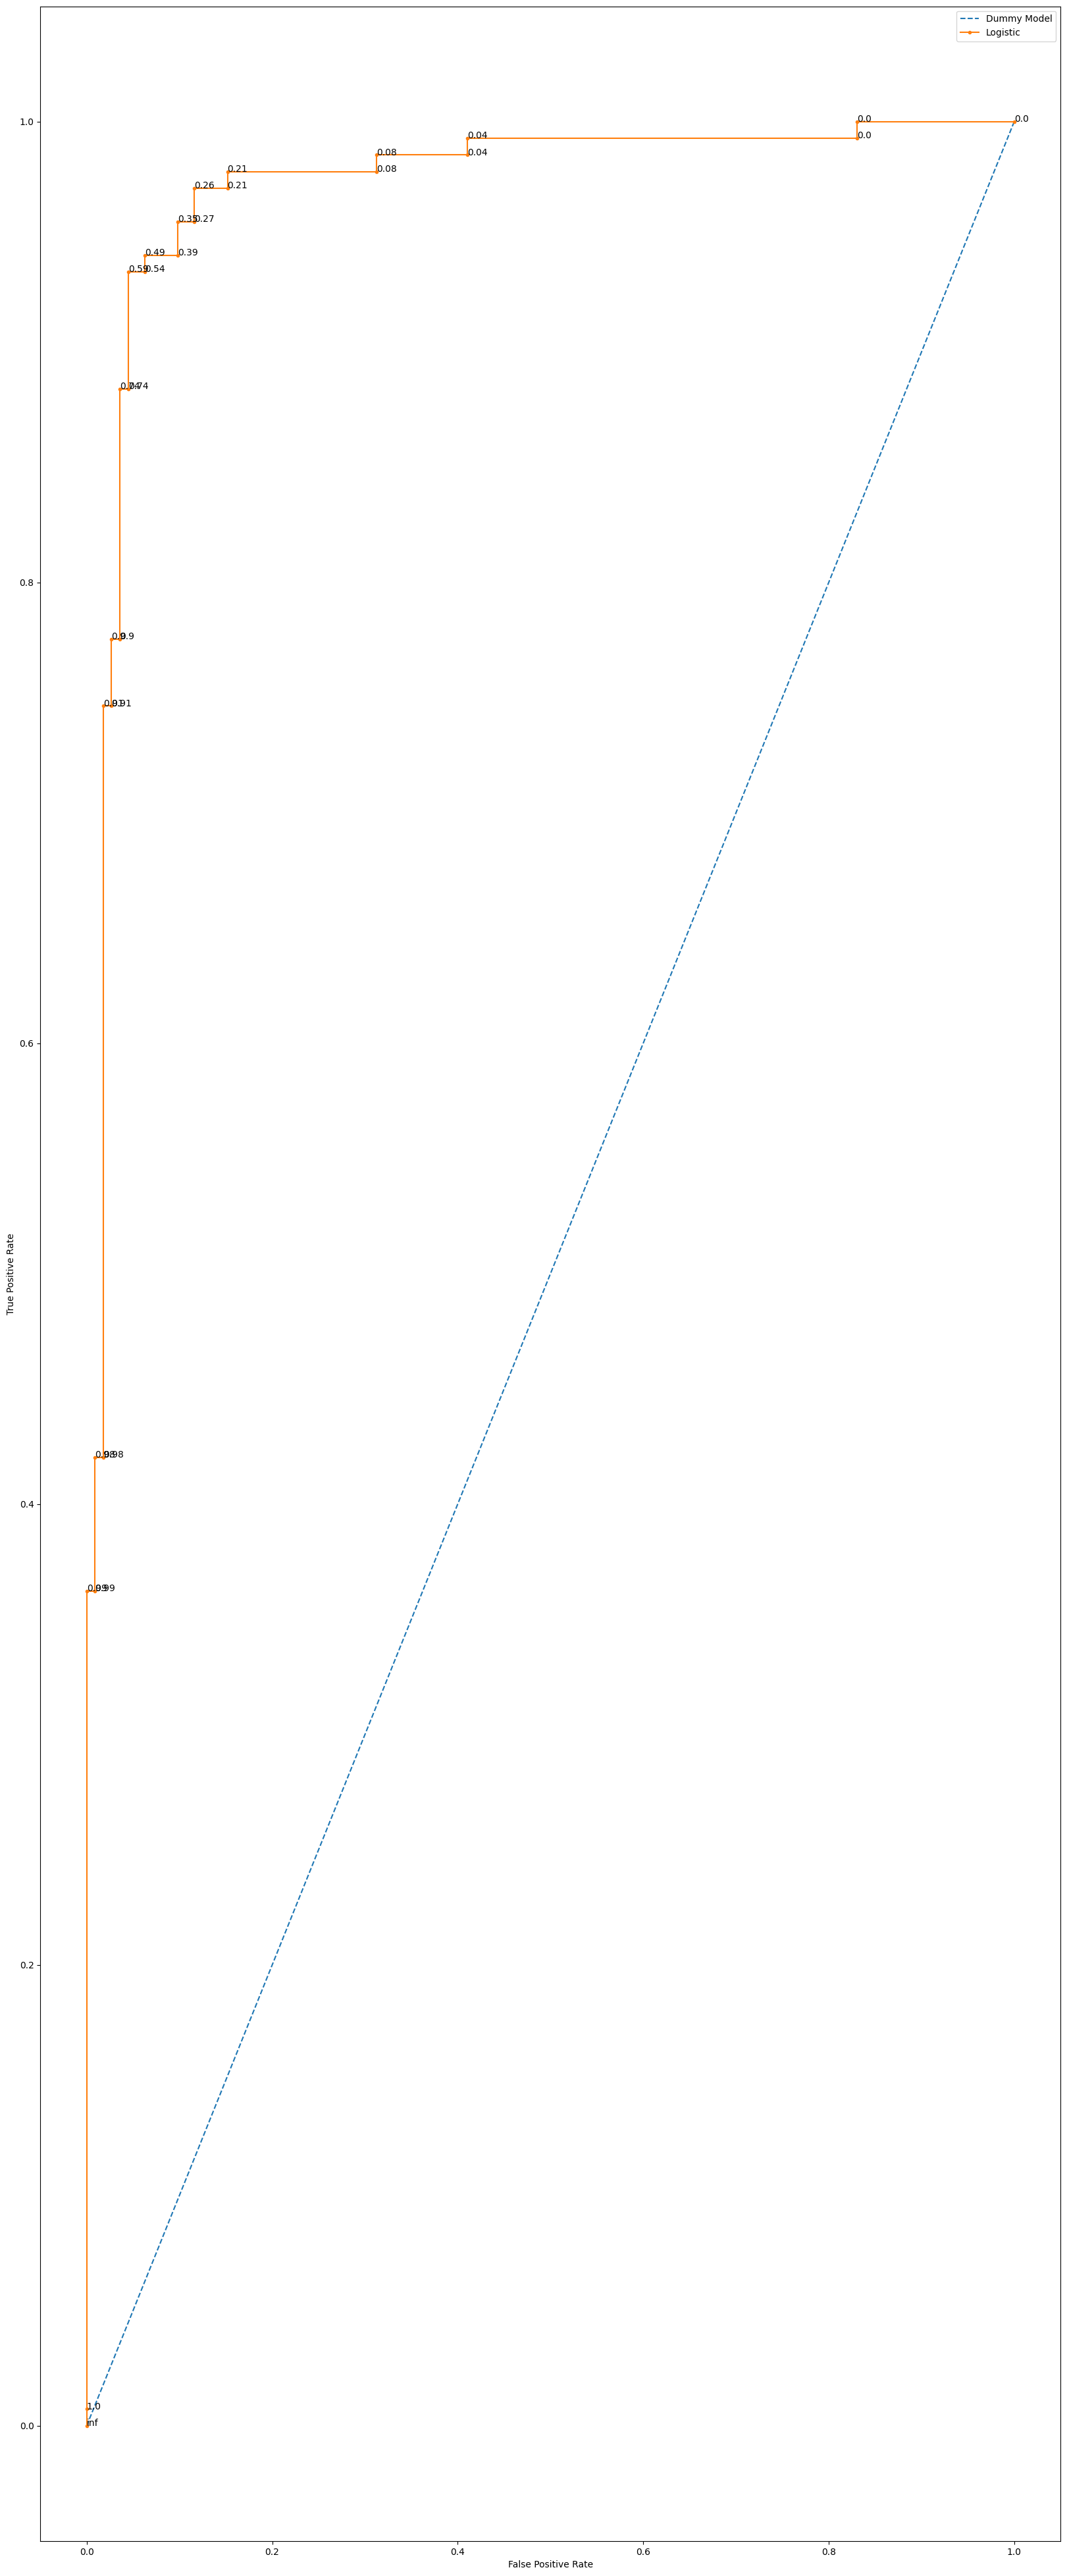

In [42]:
import numpy as np
fig = plt.figure(figsize=(20,50))
ax = fig.add_subplot(111)
ax.plot(dummy_fpr, dumm_tpr, linestyle='--', label='Dummy Model')
ax.plot(model_fpr, model_tpr, marker='.', label='Logistic')

for xyz in zip(model_fpr, model_tpr, thresholds):
    ax.annotate('%s' % np.round(xyz[2], 2), xy=(xyz[0], xyz[1]))

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()